Problem 1

a

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Conversion from spherical to Cartesian
def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

# Conversion from Cartesian to spherical
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return np.array([r, theta, phi])

# Conversion from spherical to cylindrical
def spherical_to_cylindrical(r, theta, phi):
    rho = r * np.sin(theta)
    z = r * np.cos(theta)
    psi = phi
    return np.array([rho, psi, z])

# Conversion from cylindrical to spherical
def cylindrical_to_spherical(rho, psi, z):
    r = np.sqrt(rho**2 + z**2)
    theta = np.arctan2(rho, z)
    phi = psi
    return np.array([r, theta, phi])

# Basis transformation: Spherical to Cartesian
def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    e_theta = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    e_phi = np.array([
        -np.sin(phi),
        np.cos(phi),
        0
    ])
    return e_r, e_theta, e_phi

# Basis transformation: Cylindrical to Cartesian
def cylindrical_basis_to_cartesian(psi):
    e_rho = np.array([np.cos(psi), np.sin(psi), 0])
    e_psi = np.array([-np.sin(psi), np.cos(psi), 0])
    e_z = np.array([0, 0, 1])
    return e_rho, e_psi, e_z


b

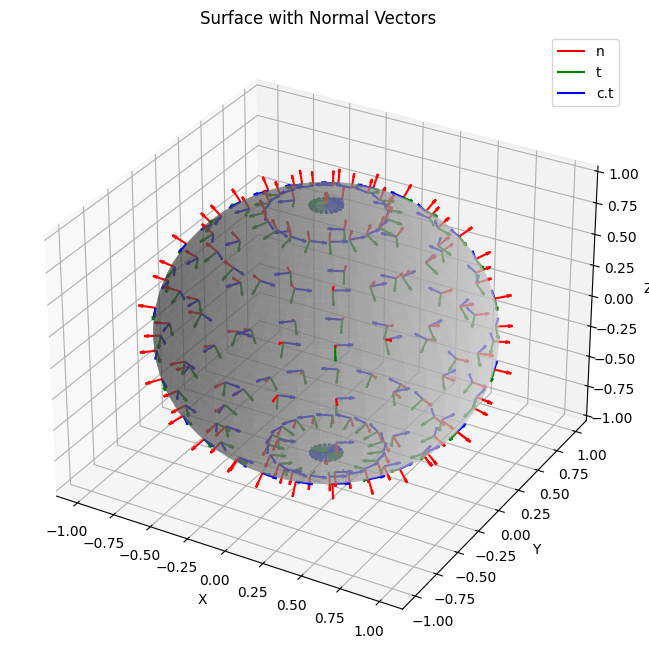

In [6]:
def visualize_multiple_bases_on_sphere():
    # Create a grid of theta and phi values
    theta_vals = np.linspace(0, np.pi, 10)  # Latitude
    phi_vals = np.linspace(0, 2 * np.pi, 20)  # Longitude

    # Prepare the figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere surface
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.sin(v), np.cos(u))
    y = np.outer(np.sin(v), np.sin(u))
    z = np.outer(np.cos(v), np.ones_like(u))
    ax.plot_surface(x, y, z, color='lightgrey', alpha=0.5)

    # Loop through grid points and plot basis vectors
    for theta in theta_vals:
        for phi in phi_vals:
            # Position vector
            r = spherical_to_cartesian(1, theta, phi)
            
            # Basis vectors at the point
            e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)
            
            # Scale for visualization
            scale = 0.1
            
            # Plot basis vectors
            ax.quiver(*r, *(scale * e_r), color='r', label='n' if theta == 0 and phi == 0 else "")
            ax.quiver(*r, *(scale * e_theta), color='g', label='t' if theta == 0 and phi == 0 else "")
            ax.quiver(*r, *(scale * e_phi), color='b', label='c.t' if theta == 0 and phi == 0 else "")

    # Labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Surface with Normal Vectors')
    ax.legend()
    plt.show()

# Example usage
visualize_multiple_bases_on_sphere()


c

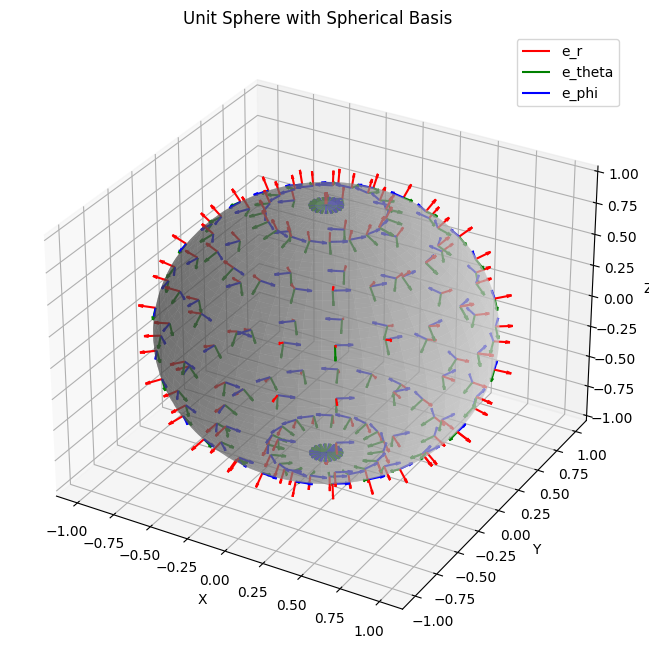

In [ ]:
# Plot the unit sphere in spherical basis {e_r, e_theta, e_phi}
def plot_sphere_with_spherical_basis():
    # Create a grid of points in spherical coordinates
    theta_vals = np.linspace(0, np.pi, 10)  # Latitude
    phi_vals = np.linspace(0, 2 * np.pi, 20)  # Longitude

    # Prepare the figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the sphere surface
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.sin(v), np.cos(u))
    y = np.outer(np.sin(v), np.sin(u))
    z = np.outer(np.cos(v), np.ones_like(u))
    ax.plot_surface(x, y, z, color='lightgrey', alpha=0.5)

    # Plot the basis vectors at grid points
    for theta in theta_vals:
        for phi in phi_vals:
            # Position vector
            r = spherical_to_cartesian(1, theta, phi)

            # Spherical basis vectors
            e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)
            
            # Scale for visualization
            scale = 0.1
            
            # Plot basis vectors
            ax.quiver(*r, *(scale * e_r), color='r', label='e_r' if theta == 0 and phi == 0 else "")
            ax.quiver(*r, *(scale * e_theta), color='g', label='e_theta' if theta == 0 and phi == 0 else "")
            ax.quiver(*r, *(scale * e_phi), color='b', label='e_phi' if theta == 0 and phi == 0 else "")

    # Labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Unit Sphere with Spherical Basis')
    ax.legend()
    plt.show()

# Call the function
plot_sphere_with_spherical_basis()


d

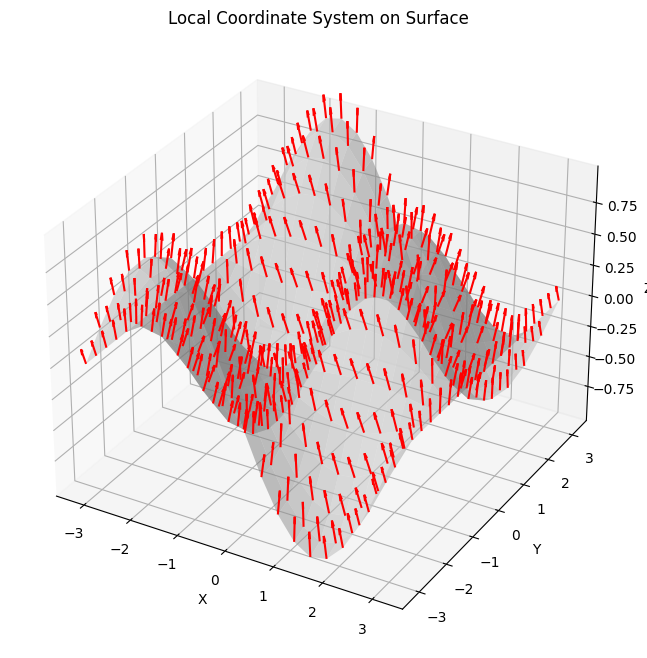

In [8]:
# Function to generate the local coordinate system on a surface
def generate_local_coordinates_on_surface(f, x_range, y_range):
    # Create a mesh grid
    x = np.linspace(*x_range, 20)
    y = np.linspace(*y_range, 20)
    X, Y = np.meshgrid(x, y)

    # Compute the surface
    Z = f(X, Y)

    # Compute gradients (partial derivatives)
    dZ_dx, dZ_dy = np.gradient(Z, x, y)

    # Compute normal vectors (cross product of partial derivatives)
    normals = np.dstack((-dZ_dx, -dZ_dy, np.ones_like(Z)))
    normal_magnitudes = np.linalg.norm(normals, axis=2)
    normals /= normal_magnitudes[..., np.newaxis]  # Normalize

    # Prepare the figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, Z, color='lightgrey', alpha=0.5)

    # Plot normal vectors
    scale = 0.2
    ax.quiver(X, Y, Z, normals[:, :, 0] * scale, normals[:, :, 1] * scale, normals[:, :, 2] * scale, color='r')

    # Labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Local Coordinate System on Surface')
    plt.show()

# Example surface function: z = sin(x) * cos(y)
surface_function = lambda x, y: np.sin(x) * np.cos(y)

# Call the function
generate_local_coordinates_on_surface(surface_function, (-np.pi, np.pi), (-np.pi, np.pi))


e

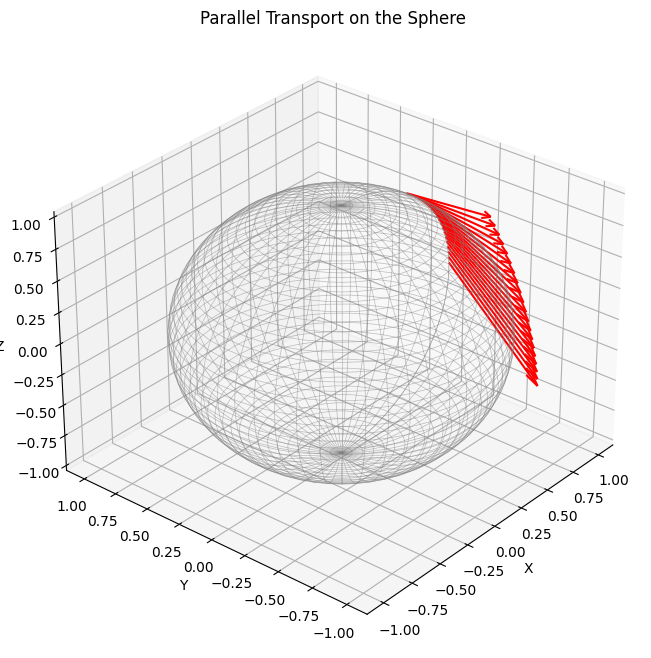

In [ ]:

# Conversion from spherical to Cartesian
def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

# Basis vectors in spherical coordinates to Cartesian coordinates
def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    e_theta = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    e_phi = np.array([
        -np.sin(phi),
        np.cos(phi),
        0
    ])
    return e_r, e_theta, e_phi

# Parallel transport simulation
def parallel_transport():
    # Parameters
    theta_start = np.pi / 5  # Initial position
    theta_end = np.pi / 2    # End position (equator)
    phi = 0                  # Always zero
    num_points = 200         # Number of steps for smooth path

    # Discretize the path
    theta_vals = np.linspace(theta_start, theta_end, num_points)

    # Initial vector (normalized)
    alpha = 1.0  # Component along e_theta
    beta = 0.0   # Component along e_phi
    n_theta = alpha
    n_phi = beta * np.sin(theta_start)

    # Normalize the vector
    norm = np.sqrt(n_theta**2 + n_phi**2)
    n_theta /= norm
    n_phi /= norm

    # Store transported vectors and positions
    transported_vectors = []
    positions = []

    for theta in theta_vals:
        # Update the vector according to the parallel transport rule
        n_phi -= n_theta * np.sin(theta) * (theta_end - theta_start) / num_points
        n_theta /= np.sqrt(n_theta**2 + n_phi**2)
        n_phi /= np.sqrt(n_theta**2 + n_phi**2)

        # Get basis vectors at the current position
        e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)

        # Compute Cartesian coordinates of the transported vector
        n_cartesian = n_theta * e_theta + n_phi * e_phi

        # Store the vector and position
        positions.append(spherical_to_cartesian(1, theta, phi))
        transported_vectors.append(n_cartesian)

    # Convert lists to numpy arrays for easier handling
    positions = np.array(positions)
    transported_vectors = np.array(transported_vectors)

    # Visualization
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the sphere with a grid
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x = np.outer(np.sin(v), np.cos(u))
    y = np.outer(np.sin(v), np.sin(u))
    z = np.outer(np.cos(v), np.ones_like(u))
    ax.plot_wireframe(x, y, z, color='grey', linewidth=0.5, alpha=0.5)

    # Plot transported vectors along the path, downsampled for clarity
    downsample_rate = 10  # Plot every 10th arrow
    for pos, vec in zip(positions[::downsample_rate], transported_vectors[::downsample_rate]):
        ax.quiver(*pos, *vec, color='r', linewidth=1.5, arrow_length_ratio=0.1)

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Parallel Transport on the Sphere')

    # Adjust the view for better alignment
    ax.view_init(elev=30, azim=220)
    plt.show()

# Run the parallel transport simulation
parallel_transport()


f

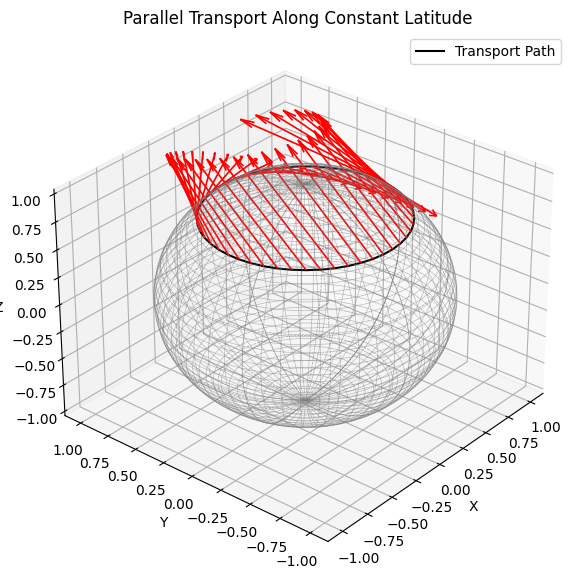

In [ ]:
from scipy.integrate import solve_ivp

# Define parameters
theta0 = np.pi / 4  # Constant latitude (45 degrees)
alpha = 1.0         # Initial e_theta component
beta = 0.0          # Initial e_phi component
phi_start = 0       # Starting longitude
phi_end = 2 * np.pi # Ending longitude

# Define the parallel transport equations
def parallel_transport(phi, n):
    n_theta, n_phi = n
    dn_theta_dphi = np.arctan(theta0) * n_phi
    dn_phi_dphi = -np.arctan(theta0) * n_theta
    return [dn_theta_dphi, dn_phi_dphi]

# Solve the ODEs
phi_values = np.linspace(phi_start, phi_end, 50)
solution = solve_ivp(parallel_transport, [phi_start, phi_end], [alpha, beta], t_eval=phi_values)
n_theta_vals, n_phi_vals = solution.y

# Convert to Cartesian coordinates for plotting
x_vals, y_vals, z_vals = [], [], []
vec_x_vals, vec_y_vals, vec_z_vals = [], [], []

for i, phi in enumerate(phi_values):
    # Spherical to Cartesian
    x = np.sin(theta0) * np.cos(phi)
    y = np.sin(theta0) * np.sin(phi)
    z = np.cos(theta0)
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)

    # Vector components in Cartesian coordinates
    n_theta = n_theta_vals[i]
    n_phi = n_phi_vals[i]
    vec_x = n_theta * np.cos(theta0) * np.cos(phi) - n_phi * np.sin(phi)
    vec_y = n_theta * np.cos(theta0) * np.sin(phi) + n_phi * np.cos(phi)
    vec_z = -n_theta * np.sin(theta0)
    vec_x_vals.append(vec_x)
    vec_y_vals.append(vec_y)
    vec_z_vals.append(vec_z)

# Plot the sphere and the transported vector
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere with a wireframe
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.sin(v), np.cos(u))
y = np.outer(np.sin(v), np.sin(u))
z = np.outer(np.cos(v), np.ones_like(u))
ax.plot_wireframe(x, y, z, color='grey', alpha=0.5, linewidth=0.5)

# Plot the geodesic (latitude line)
ax.plot(x_vals, y_vals, z_vals, color='k', linestyle='-', linewidth=1.5, label='Transport Path')

# Plot the transported vector with maximum density (no sampling)
ax.quiver(
    x_vals, y_vals, z_vals,  # Positions
    vec_x_vals, vec_y_vals, vec_z_vals,  # Vector components
    color='red', linewidth=1.2, arrow_length_ratio=0.1
)

# Plot latitude lines (constant theta, vary phi)
for lat in np.linspace(-np.pi / 2, np.pi / 2, 6):  # Choose 6 latitudes
    x_lat = np.cos(np.linspace(0, 2 * np.pi, 100)) * np.cos(lat)
    y_lat = np.sin(np.linspace(0, 2 * np.pi, 100)) * np.cos(lat)
    z_lat = np.ones(100) * np.sin(lat)
    ax.plot(x_lat, y_lat, z_lat, color="gray", linestyle="--", alpha=0.7, linewidth=0.5)

# Plot longitude lines (constant phi, vary theta)
for lon in np.linspace(0, 2 * np.pi, 12):  # Choose 12 longitudes
    x_lon = np.sin(np.linspace(0, np.pi, 100)) * np.cos(lon)
    y_lon = np.sin(np.linspace(0, np.pi, 100)) * np.sin(lon)
    z_lon = np.cos(np.linspace(0, np.pi, 100))
    ax.plot(x_lon, y_lon, z_lon, color="gray", linestyle="--", alpha=0.7, linewidth=0.5)

# Add labels and show
ax.set_title("Parallel Transport Along Constant Latitude")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.view_init(elev=30, azim=220)
plt.show()


g

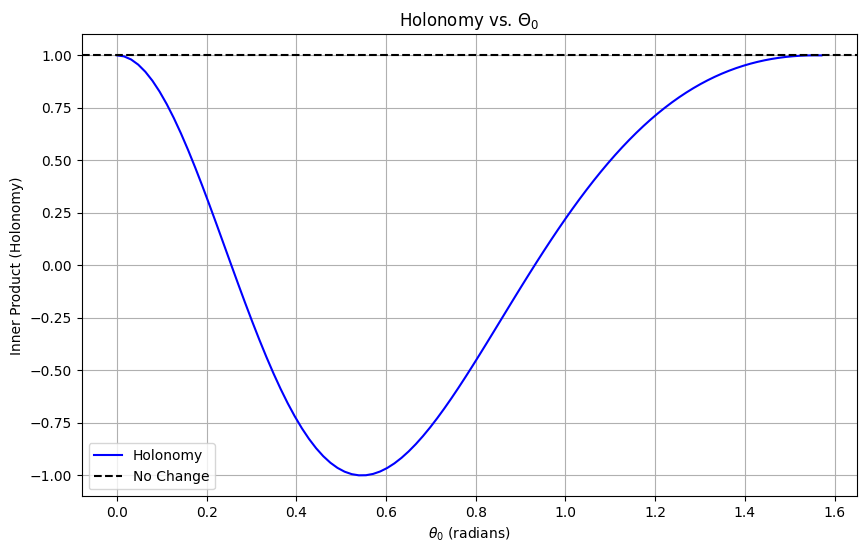

In [ ]:
# Define the parallel transport equations
def parallel_transport(phi, n, theta0):
    n_theta, n_phi = n
    dn_theta_dphi = np.arctan(theta0) * n_phi
    dn_phi_dphi = -np.arctan(theta0) * n_theta
    return [dn_theta_dphi, dn_phi_dphi]

# Function to compute holonomy for a given theta0
def compute_holonomy(theta0, num_points=100):
    # Initial conditions
    alpha = 1.0  # Initial e_theta component
    beta = 0.0   # Initial e_phi component
    phi_start = 0
    phi_end = 2 * np.pi

    # Solve the ODEs
    phi_values = np.linspace(phi_start, phi_end, num_points)
    solution = solve_ivp(parallel_transport, [phi_start, phi_end], [alpha, beta], t_eval=phi_values, args=(theta0,))
    n_theta_vals, n_phi_vals = solution.y

    # Initial vector in Cartesian coordinates
    initial_vec = np.array([alpha, beta])

    # Final vector in Cartesian coordinates
    final_vec = np.array([n_theta_vals[-1], n_phi_vals[-1]])

    # Compute the inner product between the initial and final vectors
    inner_product = np.dot(initial_vec, final_vec)
    return inner_product

# Compute holonomy for a range of theta0 values
theta0_values = np.linspace(0, np.pi / 2, 100)  # Vary theta0 from 0 to pi/2
holonomy_values = [compute_holonomy(theta0) for theta0 in theta0_values]

# Plot the holonomy as a function of theta0
plt.figure(figsize=(10, 6))
plt.plot(theta0_values, holonomy_values, label="Holonomy", color='b')
plt.axhline(1, color='k', linestyle='--', label="No Change")
plt.xlabel(r"$\theta_0$ (radians)")
plt.ylabel("Inner Product (Holonomy)")
plt.title("Holonomy vs. $\Theta_0$")
plt.legend()
plt.grid()
plt.show()
